# visualise DARS

In [1]:
import glob
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
%load_ext lab_black

In [11]:
dar_path_dict_dict = {
    y: {
        "_".join(z.split("/")[-1].split("__")[-2].split("_VS")[0].split("_")[1:]): z
        for z in sorted(glob.glob("downstream_analysis/DARs/*" + y + "/*DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}
dar_path_dict_dict

{'10xmultiome': {'sampleA_B_cell': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_B_cell_VS_10xmultiome_sampleB_B_cell__DARs.bed',
  'sampleA_CD14+_monocyte': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte__DARs.bed',
  'sampleA_CD4+_T_cell': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell__DARs.bed',
  'sampleA_Cytotoxic_T_cell': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell__DARs.bed',
  'sampleB_B_cell': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_B_cell_VS_10xmultiome_sampleA_B_cell__DARs.bed',
  'sampleB_CD14+_monocyte': 'downstream_analysis/DARs/10xmultiome/10xmultiome__10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte__DARs.bed',
  'sampleB_CD4+_T_cell': 'downstream_analysis/DARs/1

In [12]:
import numpy as np

In [13]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        # if "Cytotoxic" in cell_type or "B_cell" in cell_type:
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:200]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df[df[4] > np.log2(1.2)])
        print(2 ** min(df[4]))

10xmultiome
sampleA_B_cell
1.0124393892244123
sampleA_CD14+_monocyte
1.000456627092877
sampleA_CD4+_T_cell
1.00632641187058
sampleA_Cytotoxic_T_cell
1.0000022072109556
sampleB_B_cell
1.010863839556262
sampleB_CD14+_monocyte
1.0001683738571452
sampleB_CD4+_T_cell
1.0053759785016467
sampleB_Cytotoxic_T_cell
1.000007833296668
10xv1
sampleA_B_cell
1.0000364214871733
sampleA_CD14+_monocyte
1.0000882810525946
sampleA_CD16+_monocyte
1.0173464619076318
sampleA_CD4+_T_cell
1.0000433737099972
sampleA_Cytotoxic_T_cell
1.0000023719000926
sampleA_Dendritic_cell
1.0274516769131117
sampleA_Natural_killer_cell
1.0002817400437303
sampleB_B_cell
1.0000378673728245
sampleB_CD14+_monocyte
1.0003633498422406
sampleB_CD16+_monocyte
1.01802904889481
sampleB_CD4+_T_cell
1.0001060100480823
sampleB_Cytotoxic_T_cell
1.000001747520558
sampleB_Dendritic_cell
1.0481027260357578
sampleB_Natural_killer_cell
1.0000734263668642
10xv11
sampleA_B_cell
1.0004671481052936
sampleA_CD14+_monocyte
1.0001579970040735
sampleA_C

In [14]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [15]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample
0,chr20,49768181,49768681,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.898787,.,0.037613,10xmultiome
1,chr17,45320333,45320833,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.895001,.,0.000742,10xmultiome
2,chr3,39358212,39358712,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.887998,.,0.015440,10xmultiome
3,chr2,203720806,203721306,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.858817,.,0.002433,10xmultiome
4,chr3,69065272,69065772,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.834336,.,0.023398,10xmultiome
...,...,...,...,...,...,...,...,...
195,chr6,163704053,163704553,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496317,.,0.022933,s3atac
196,chr1,203202426,203202926,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac
197,chr19,23774091,23774591,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac
198,chr16,84069420,84069920,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac


In [16]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [17]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                                                   
10xmultiome  10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell    10000
             10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte        10000
             10xmultiome_sampleB_Cytotoxic_T_cell_VS_10xmultiome_sampleA_Cytotoxic_T_cell    10000
             10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell               9807
             10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte         9689
                                                                                             ...  
mtscatac     mtscatac_sampleB_B_cell_VS_mtscatac_sampleA_B_cell                                928
s3atac       s3atac_sampleA_Cytotoxic_T_cell_VS_s3atac_sampleB_Cytotoxic_T_cell              10000
             s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_sampleA_Cytotoxic_T_cell              10000
             s3atac

In [18]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

# pivoted heatmap

In [19]:
male_female_alias_dict = {
    x.split("_VS")[0]: x.replace("sampleA", "\u2642")
    .replace("sampleB", "\u2640")
    .split("_VS_")[0]
    .replace("_", " ")
    .replace("CD4+", "Naive")
    + "s"
    for x in [
        "sampleA_B_cell_VS_sampleB_B_cell",
        "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
        "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
        "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte",
        "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
        "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
        "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
        "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
        "sampleB_B_cell_VS_sampleA_B_cell",
        "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
        "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
        "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
        "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
        "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
    ]
}
male_female_alias_dict

{'sampleA_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleB_CD16+_monocyte': '♀ CD16+ monocytes',
 'sampleA_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell': '♀ Natural killer cells'}

In [20]:
sorted(
    [
        x.replace("sampleA", "\u2642")
        .replace("sampleB", "\u2640")
        .split("_VS_")[0]
        .replace("_", " ")
        .replace("CD4+", "Naive")
        + "s"
        for x in [
            "sampleA_B_cell_VS_sampleB_B_cell",
            "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
            "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
            "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
            "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
            "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
            "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
            "sampleB_B_cell_VS_sampleA_B_cell",
            "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
            "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
            "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
            "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
            "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
        ]
    ]
)

['♀ B cells',
 '♀ CD14+ monocytes',
 '♀ Cytotoxic T cells',
 '♀ Dendritic cells',
 '♀ Naive T cells',
 '♀ Natural killer cells',
 '♂ B cells',
 '♂ CD14+ monocytes',
 '♂ CD16+ monocytes',
 '♂ Cytotoxic T cells',
 '♂ Dendritic cells',
 '♂ Naive T cells',
 '♂ Natural killer cells']

In [21]:
[
    "♀ CD14+ monocytes",
    "♂ CD14+ monocytes",
    "♂ CD16+ monocytes",
    "♀ Dendritic cells",
    "♂ Dendritic cells",
    "♀ Naive T cells",
    "♂ Naive T cells",
    "♀ Natural killer cells",
    "♂ Natural killer cells",
]

['♀ CD14+ monocytes',
 '♂ CD14+ monocytes',
 '♂ CD16+ monocytes',
 '♀ Dendritic cells',
 '♂ Dendritic cells',
 '♀ Naive T cells',
 '♂ Naive T cells',
 '♀ Natural killer cells',
 '♂ Natural killer cells']

In [22]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    "\u2640 CD14+ monocytes",
    "\u2642 CD14+ monocytes",
    "\u2642 CD16+ monocytes",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
    "\u2640 Dendritic cells",
    # "\u2642 Dendritic cells",
    "\u2640 Naive T cells",
    "\u2642 Naive T cells",
    "\u2640 Natural killer cells",
    "\u2642 Natural killer cells",
]

In [23]:
# male_female_order = [
#     "\u2640 B cells",
#     "\u2642 B cells",
#     "\u2640 Cytotoxic T cells",
#     "\u2642 Cytotoxic T cells",
# ]

In [24]:
df_merged["cell_type_specific"] = [
    "_".join(x.split("_VS_")[0].split("_")[1:]) for x in df_merged["cell_type"]
]

In [25]:
df_merged["cell_type_specific"].unique()

array(['sampleA_B_cell', 'sampleA_CD14+_monocyte', 'sampleA_CD4+_T_cell',
       'sampleA_Cytotoxic_T_cell', 'sampleB_B_cell',
       'sampleB_CD14+_monocyte', 'sampleB_CD4+_T_cell',
       'sampleB_Cytotoxic_T_cell', 'sampleA_CD16+_monocyte',
       'sampleA_Dendritic_cell', 'sampleA_Natural_killer_cell',
       'sampleB_CD16+_monocyte', 'sampleB_Dendritic_cell',
       'sampleB_Natural_killer_cell'], dtype=object)

In [26]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type_specific", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

df_merged_pivot

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,1.024516,1.119197,0.479206,0.699853,0.992429,1.870566,0.564965,0.112483,0.451877,0.861870,0.392596,0.771887
10x v1.1,0.677856,1.182070,0.207926,0.366170,NaN,1.275412,0.711687,NaN,0.546244,0.341460,0.432619,0.158234
10x v2,0.310172,1.274258,0.440135,0.777147,0.457331,1.182562,0.505654,NaN,0.372714,0.893246,0.408969,0.653392
10x Multiome,0.499952,0.497177,0.358974,0.401927,NaN,1.298608,0.543559,NaN,0.292207,0.408143,NaN,NaN
mtscATAC-seq,0.478896,0.648255,0.373169,0.842766,NaN,0.539763,0.514825,NaN,0.461646,0.352094,NaN,NaN
ddSEQ SureCell,0.743860,1.100702,0.110826,0.299178,0.215270,0.489148,0.717864,NaN,0.404871,0.385894,NaN,NaN
s3-ATAC,NaN,NaN,0.447063,0.089186,NaN,0.535883,0.214909,NaN,NaN,NaN,NaN,NaN
HyDrop,0.311971,0.437167,0.722984,0.407244,NaN,0.482445,0.405110,NaN,0.522270,0.341551,0.140446,0.297605


### in real values

In [27]:
from sklearn.preprocessing import minmax_scale

In [28]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [29]:
df_merged_pivot_abs_normalized

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,1.000000,0.768517,0.550385,0.768202,1.000000,1.000000,0.658358,0.0,0.607834,0.932311,0.850756,1.000000
10x v1.1,0.453040,0.859389,0.131722,0.308553,NaN,0.452977,0.985484,NaN,1.000000,0.000000,1.000000,0.000000
10x v2,0.000000,1.000000,0.485127,0.890714,0.255945,0.386204,0.535278,NaN,0.298068,1.000000,0.911311,0.772407
10x Multiome,0.219419,0.054006,0.355091,0.352879,NaN,0.470340,0.613353,NaN,0.000000,0.101536,NaN,NaN
mtscATAC-seq,0.193626,0.200346,0.377311,1.000000,NaN,0.025059,0.553981,NaN,0.647252,0.015879,NaN,NaN
ddSEQ SureCell,0.547311,0.742531,0.000000,0.228408,0.000000,0.002880,1.000000,NaN,0.421851,0.067136,NaN,NaN
s3-ATAC,NaN,NaN,0.496570,0.000000,NaN,0.023331,0.000000,NaN,NaN,NaN,NaN,NaN
HyDrop,0.001947,0.000000,1.000000,0.359565,NaN,0.000000,0.337852,NaN,0.897927,0.000135,0.000000,0.191320


In [30]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,cell_type_specific
0,chr20,49768181,49768681,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.898787,.,0.037613,10xmultiome,10xmultiome,sampleA_B_cell
1,chr17,45320333,45320833,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.895001,.,0.000742,10xmultiome,10xmultiome,sampleA_B_cell
2,chr3,39358212,39358712,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.887998,.,0.015440,10xmultiome,10xmultiome,sampleA_B_cell
3,chr2,203720806,203721306,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.858817,.,0.002433,10xmultiome,10xmultiome,sampleA_B_cell
4,chr3,69065272,69065772,10xmultiome_sampleA_B_cell_VS_10xmultiome_samp...,0.834336,.,0.023398,10xmultiome,10xmultiome,sampleA_B_cell
...,...,...,...,...,...,...,...,...,...,...
195,chr6,163704053,163704553,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496317,.,0.022933,s3atac,s3atac,sampleB_Cytotoxic_T_cell
196,chr1,203202426,203202926,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac,s3atac,sampleB_Cytotoxic_T_cell
197,chr19,23774091,23774591,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac,s3atac,sampleB_Cytotoxic_T_cell
198,chr16,84069420,84069920,s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_samp...,0.496121,.,0.004974,s3atac,s3atac,sampleB_Cytotoxic_T_cell


In [31]:
import matplotlib.pyplot as plt

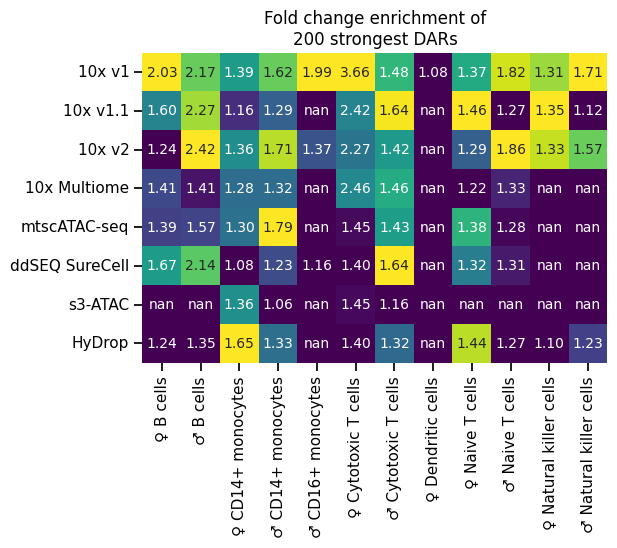

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_merged_pivot_abs_normalized.fillna(value=0),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)
# plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n200 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_top2k_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [33]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [34]:
df_lens = df_lens.loc[tech_order]

df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

In [35]:
df_lens

,♀ B cells,♂ B cells,♀ CD14+ monocytes,♂ CD14+ monocytes,♂ CD16+ monocytes,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Dendritic cells,♀ Naive T cells,♂ Naive T cells,♀ Natural killer cells,♂ Natural killer cells
10x v1,1420.0,4626.0,363.0,2476.0,594.0,21482.0,6182.0,0.0,222.0,4302.0,274.0,812.0
10x v1.1,313.0,7062.0,28.0,244.0,NaN,28876.0,9203.0,NaN,551.0,547.0,337.0,35.0
10x v2,191.0,7727.0,250.0,2196.0,1224.0,6920.0,3901.0,NaN,299.0,5549.0,459.0,2006.0
10x Multiome,753.0,657.0,228.0,389.0,NaN,24934.0,3274.0,NaN,142.0,1555.0,NaN,NaN
mtscATAC-seq,425.0,1185.0,195.0,4973.0,NaN,29153.0,4816.0,NaN,1327.0,997.0,NaN,NaN
ddSEQ SureCell,873.0,4380.0,17.0,119.0,37.0,3342.0,5351.0,NaN,995.0,265.0,NaN,NaN
s3-ATAC,NaN,NaN,810.0,0.0,NaN,15777.0,0.0,NaN,NaN,NaN,NaN,NaN
HyDrop,146.0,993.0,2192.0,318.0,NaN,21911.0,4101.0,NaN,1150.0,739.0,1.0,167.0


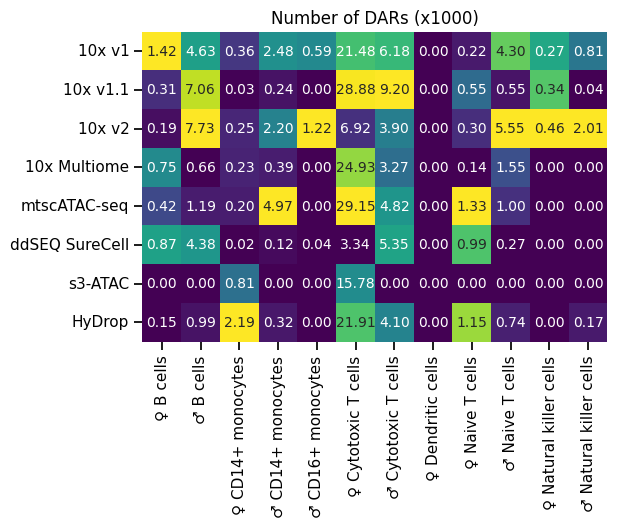

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data=df_lens_normalized.fillna(value=int(0)),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=(df_lens / 1000).fillna(value=int(0)),
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)


# plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# Select the most pronounced cell types

In [37]:
male_female_order = [
    "\u2640 B cells",
    "\u2642 B cells",
    # "\u2640 CD14+ monocytes",
    # "\u2642 CD14+ monocytes",
    # "\u2642 CD16+ monocytes",
    "\u2640 Cytotoxic T cells",
    "\u2642 Cytotoxic T cells",
    # "\u2640 Dendritic cells",
    # "\u2642 Dendritic cells",
    "\u2640 Naive T cells",
    "\u2642 Naive T cells",
    # "\u2640 Natural killer cells",
    # "\u2642 Natural killer cells",
]

In [38]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        # if "Cytotoxic" in cell_type or "B_cell" in cell_type:
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:200]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df[df[4] > np.log2(1.2)])
        print(2 ** min(df[4]))

10xmultiome
sampleA_B_cell
1.0124393892244123
sampleA_CD14+_monocyte
1.000456627092877
sampleA_CD4+_T_cell
1.00632641187058
sampleA_Cytotoxic_T_cell
1.0000022072109556
sampleB_B_cell
1.010863839556262
sampleB_CD14+_monocyte
1.0001683738571452
sampleB_CD4+_T_cell
1.0053759785016467
sampleB_Cytotoxic_T_cell
1.000007833296668
10xv1
sampleA_B_cell
1.0000364214871733
sampleA_CD14+_monocyte
1.0000882810525946
sampleA_CD16+_monocyte
1.0173464619076318
sampleA_CD4+_T_cell
1.0000433737099972
sampleA_Cytotoxic_T_cell
1.0000023719000926
sampleA_Dendritic_cell
1.0274516769131117
sampleA_Natural_killer_cell
1.0002817400437303
sampleB_B_cell
1.0000378673728245
sampleB_CD14+_monocyte
1.0003633498422406
sampleB_CD16+_monocyte
1.01802904889481
sampleB_CD4+_T_cell
1.0001060100480823
sampleB_Cytotoxic_T_cell
1.000001747520558
sampleB_Dendritic_cell
1.0481027260357578
sampleB_Natural_killer_cell
1.0000734263668642
10xv11
sampleA_B_cell
1.0004671481052936
sampleA_CD14+_monocyte
1.0001579970040735
sampleA_C

In [39]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [40]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [41]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type                                                                   
10xmultiome  10xmultiome_sampleA_Cytotoxic_T_cell_VS_10xmultiome_sampleB_Cytotoxic_T_cell    10000
             10xmultiome_sampleB_CD14+_monocyte_VS_10xmultiome_sampleA_CD14+_monocyte        10000
             10xmultiome_sampleB_Cytotoxic_T_cell_VS_10xmultiome_sampleA_Cytotoxic_T_cell    10000
             10xmultiome_sampleA_CD4+_T_cell_VS_10xmultiome_sampleB_CD4+_T_cell               9807
             10xmultiome_sampleA_CD14+_monocyte_VS_10xmultiome_sampleB_CD14+_monocyte         9689
                                                                                             ...  
mtscatac     mtscatac_sampleB_B_cell_VS_mtscatac_sampleA_B_cell                                928
s3atac       s3atac_sampleA_Cytotoxic_T_cell_VS_s3atac_sampleB_Cytotoxic_T_cell              10000
             s3atac_sampleB_Cytotoxic_T_cell_VS_s3atac_sampleA_Cytotoxic_T_cell              10000
             s3atac

# pivoted heatmap

In [42]:
male_female_alias_dict = {
    x.split("_VS")[0]: x.replace("sampleA", "\u2642")
    .replace("sampleB", "\u2640")
    .split("_VS_")[0]
    .replace("_", " ")
    .replace("CD4+", "Naive")
    + "s"
    for x in [
        "sampleA_B_cell_VS_sampleB_B_cell",
        "sampleA_CD14+_monocyte_VS_sampleB_CD14+_monocyte",
        "sampleA_CD16+_monocyte_VS_sampleB_CD16+_monocyte",
        "sampleB_CD16+_monocyte_VS_sampleA_CD16+_monocyte",
        "sampleA_CD4+_T_cell_VS_sampleB_CD4+_T_cell",
        "sampleA_Cytotoxic_T_cell_VS_sampleB_Cytotoxic_T_cell",
        "sampleA_Dendritic_cell_VS_sampleB_Dendritic_cell",
        "sampleA_Natural_killer_cell_VS_sampleB_Natural_killer_cell",
        "sampleB_B_cell_VS_sampleA_B_cell",
        "sampleB_CD14+_monocyte_VS_sampleA_CD14+_monocyte",
        "sampleB_CD4+_T_cell_VS_sampleA_CD4+_T_cell",
        "sampleB_Cytotoxic_T_cell_VS_sampleA_Cytotoxic_T_cell",
        "sampleB_Dendritic_cell_VS_sampleA_Dendritic_cell",
        "sampleB_Natural_killer_cell_VS_sampleA_Natural_killer_cell",
    ]
}
male_female_alias_dict

{'sampleA_B_cell': '♂ B cells',
 'sampleA_CD14+_monocyte': '♂ CD14+ monocytes',
 'sampleA_CD16+_monocyte': '♂ CD16+ monocytes',
 'sampleB_CD16+_monocyte': '♀ CD16+ monocytes',
 'sampleA_CD4+_T_cell': '♂ Naive T cells',
 'sampleA_Cytotoxic_T_cell': '♂ Cytotoxic T cells',
 'sampleA_Dendritic_cell': '♂ Dendritic cells',
 'sampleA_Natural_killer_cell': '♂ Natural killer cells',
 'sampleB_B_cell': '♀ B cells',
 'sampleB_CD14+_monocyte': '♀ CD14+ monocytes',
 'sampleB_CD4+_T_cell': '♀ Naive T cells',
 'sampleB_Cytotoxic_T_cell': '♀ Cytotoxic T cells',
 'sampleB_Dendritic_cell': '♀ Dendritic cells',
 'sampleB_Natural_killer_cell': '♀ Natural killer cells'}

In [43]:
df_merged["cell_type_specific"] = [
    "_".join(x.split("_VS_")[0].split("_")[1:]) for x in df_merged["cell_type"]
]

In [44]:
df_merged["cell_type_specific"].unique()

array(['sampleA_B_cell', 'sampleA_CD14+_monocyte', 'sampleA_CD4+_T_cell',
       'sampleA_Cytotoxic_T_cell', 'sampleB_B_cell',
       'sampleB_CD14+_monocyte', 'sampleB_CD4+_T_cell',
       'sampleB_Cytotoxic_T_cell', 'sampleA_CD16+_monocyte',
       'sampleA_Dendritic_cell', 'sampleA_Natural_killer_cell',
       'sampleB_CD16+_monocyte', 'sampleB_Dendritic_cell',
       'sampleB_Natural_killer_cell'], dtype=object)

In [45]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type_specific", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [male_female_alias_dict[x] for x in df_merged_pivot.columns]
df_merged_pivot = df_merged_pivot[male_female_order]

df_merged_pivot

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Naive T cells,♂ Naive T cells
10x v1,1.024516,1.119197,1.870566,0.564965,0.451877,0.861870
10x v1.1,0.677856,1.182070,1.275412,0.711687,0.546244,0.341460
10x v2,0.310172,1.274258,1.182562,0.505654,0.372714,0.893246
10x Multiome,0.499952,0.497177,1.298608,0.543559,0.292207,0.408143
mtscATAC-seq,0.478896,0.648255,0.539763,0.514825,0.461646,0.352094
ddSEQ SureCell,0.743860,1.100702,0.489148,0.717864,0.404871,0.385894
s3-ATAC,NaN,NaN,0.535883,0.214909,NaN,NaN
HyDrop,0.311971,0.437167,0.482445,0.405110,0.522270,0.341551


### in real values

In [46]:
from sklearn.preprocessing import minmax_scale

In [47]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [48]:
df_merged_pivot_abs_normalized

,♀ B cells,♂ B cells,♀ Cytotoxic T cells,♂ Cytotoxic T cells,♀ Naive T cells,♂ Naive T cells
10x v1,1.000000,0.768517,1.000000,0.658358,0.607834,0.932311
10x v1.1,0.453040,0.859389,0.452977,0.985484,1.000000,0.000000
10x v2,0.000000,1.000000,0.386204,0.535278,0.298068,1.000000
10x Multiome,0.219419,0.054006,0.470340,0.613353,0.000000,0.101536
mtscATAC-seq,0.193626,0.200346,0.025059,0.553981,0.647252,0.015879
ddSEQ SureCell,0.547311,0.742531,0.002880,1.000000,0.421851,0.067136
s3-ATAC,NaN,NaN,0.023331,0.000000,NaN,NaN
HyDrop,0.001947,0.000000,0.000000,0.337852,0.897927,0.000135


In [49]:
import matplotlib.pyplot as plt

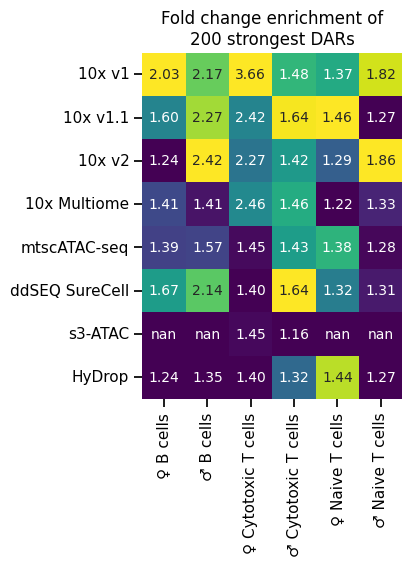

In [50]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_merged_pivot_abs_normalized.fillna(value=0),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)
# plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
plt.title("Fold change enrichment of\n200 strongest DARs")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top200_DARs_fc_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_top200_DARs_fc_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# n_DARs

In [51]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [52]:
df_lens = df_lens.loc[tech_order]

df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

df_lens.columns = [male_female_alias_dict[x] for x in df_lens.columns]
df_lens = df_lens[male_female_order]

df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

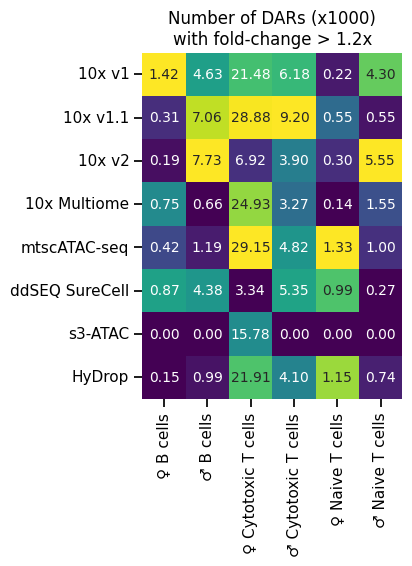

In [53]:
fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.heatmap(
    data=df_lens_normalized.fillna(value=int(0)),
    square=True,
    cmap="viridis",
    ax=ax,
    annot=(df_lens / 1000).fillna(value=int(0)),
    annot_kws={"fontsize": 10},
    cbar=False,
    fmt=".2f",
)


# plt.xticks(rotation=45, ha="right")
plt.title("Number of DARs (x1000)\nwith fold-change > 1.2x")
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__male_female_selected_ndars_heatmap.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)